In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib

from math import sqrt

SPINE_COLOR = 'gray'


In [12]:
def latexify(fig_width=None, fig_height=None, columns=1):
    """Set up matplotlib's RC params for LaTeX plotting.
    Call this before plotting a figure.

    Parameters
    ----------
    fig_width : float, optional, inches
    fig_height : float,  optional, inches
    columns : {1, 2}
    """

    # code adapted from http://www.scipy.org/Cookbook/Matplotlib/LaTeX_Examples

    # Width and max height in inches for IEEE journals taken from
    # computer.org/cms/Computer.org/Journal%20templates/transactions_art_guide.pdf

    assert(columns in [1,2])

    if fig_width is None:
        fig_width = 3.39 if columns==1 else 6.9 # width in inches

    if fig_height is None:
        golden_mean = (sqrt(5)-1.0)/2.0    # Aesthetic ratio
        fig_height = fig_width*golden_mean # height in inches

    MAX_HEIGHT_INCHES = 8.0
    if fig_height > MAX_HEIGHT_INCHES:
        print("WARNING: fig_height too large:" + fig_height + 
              "so will reduce to" + MAX_HEIGHT_INCHES + "inches.")
        fig_height = MAX_HEIGHT_INCHES

    params = {'backend': 'ps',
              'text.latex.preamble': [r'\usepackage{gensymb}'],
              'axes.labelsize': 8, # fontsize for x and y labels (was 10)
              'axes.titlesize': 8,
              'font.size': 18, # was 10
              'legend.fontsize': 8, # was 10
              'xtick.labelsize': 8,
              'ytick.labelsize': 8,
              'text.usetex': True,
              'figure.figsize': [fig_width,fig_height],
              'font.family': 'serif'
              'text' : 
    }

    matplotlib.rcParams.update(params)


def format_axes(ax):

    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

    for spine in ['left', 'bottom']:
        ax.spines[spine].set_color(SPINE_COLOR)
        ax.spines[spine].set_linewidth(0.5)

    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    for axis in [ax.xaxis, ax.yaxis]:
        axis.set_tick_params(direction='out', color=SPINE_COLOR)

    return ax

In [13]:
%matplotlib inline

In [14]:
df = pd.DataFrame(np.random.randn(10,2))
df.columns = ['Column 1', 'Column 2']


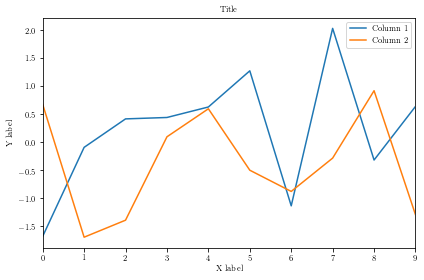

In [15]:
ax = df.plot()
ax.set_xlabel("X label")
ax.set_ylabel("Y label")
ax.set_title("Title")
plt.tight_layout()

In [16]:
latexify(fig_width=12, fig_height=8)

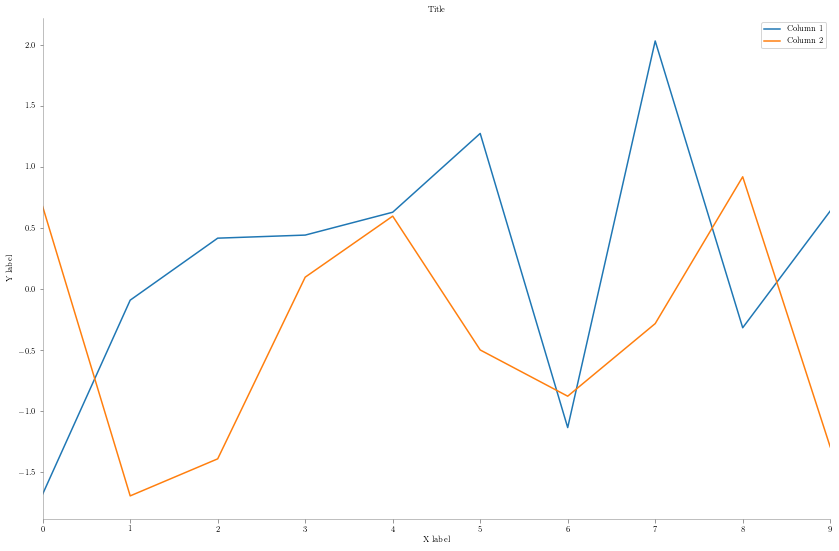

In [17]:
ax = df.plot()
ax.set_xlabel("X label")
ax.set_ylabel("Y label")
ax.set_title("Title")
plt.tight_layout()
format_axes(ax)


# Results

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# plt.style.use('fivethirtyeight')
sns.set(style="whitegrid")

## Beijing A

In [10]:
splits = 6

In [11]:
temp = []
for reg in ['las', 'knn', 'xgb', 'xgbRF', 'svr', 'gpST']:
    try:
        odf = pd.read_csv(f"./results/beijinga_scaled/{reg}/final.csv")        
        new_temp = odf[odf["is_val_error"] == False]
        lastKDayss = new_temp['lastKDays'].unique()
        for lastKDays in lastKDayss:
            temp.append(new_temp[(new_temp['lastKDays'] == lastKDays) & (new_temp['time_ix'] >= lastKDays - 1)])
    except FileNotFoundError:
        pass
df = pd.concat(temp)
# df = df.append(interpols)
df = df[~(df['reg'] == "SVGP") & ~(df['lastKDays'].isin([100, 200]))]
plt.figure(figsize=(12, 8))
df = df.rename(columns={"reg": "Method"})


<Figure size 864x576 with 0 Axes>

In [12]:
# new_df.head()

In [13]:
temp = {
    "Method": [],
    "time_ix": [],
    "rmse": [],
    "mae": [],
    "kout": [],
}
for called_reg, reg in zip(['IDW', 'Kriging', 'Spatial GP'], ['idw', 'krig', 'spatial_gp']):
    df_rmse = pd.read_csv(f"../interpol_baselines/{reg}_rmse.csv").T
    df_mae = pd.read_csv(f"../interpol_baselines/{reg}_mae.csv").T
    for ix, row in enumerate(sorted(df_rmse.index)):
        if ix % 2 == 0:
            continue
        temp["Method"].extend([called_reg] * splits)
        temp["time_ix"].extend([ix] * splits)
        temp["rmse"].extend(list(df_rmse.loc[row][[i for i in range(splits)]]))
        temp["mae"].extend(list(df_mae.loc[row][[i for i in range(splits)]]))
        temp["kout"].extend(list(range(splits)))

values_total = len(temp["Method"])
temp["lastKDays"] = [1] * values_total
temp["is_val_error"] = [False] * values_total
temp["stepSize"] = [2] * values_total
temp["kin"] = [-1] * values_total
temp["kout"] = [-1] * values_total
temp["hy_ix"] = [-1] * values_total
for col in df.columns:
    temp[col]
interpols = pd.DataFrame(temp)[df.columns]
interpols.head()

,is_val_error,Method,stepSize,lastKDays,kout,kin,time_ix,hy_ix,rmse,mae
0,False,IDW,2,1,-1,-1,1,-1,7.880223,7.321755
1,False,IDW,2,1,-1,-1,1,-1,11.665378,7.219419
2,False,IDW,2,1,-1,-1,1,-1,10.522260,9.401343
3,False,IDW,2,1,-1,-1,1,-1,8.760199,6.997543
4,False,IDW,2,1,-1,-1,1,-1,8.268696,6.032451


In [14]:
df = df.append(interpols)

In [15]:
df.tail()

,is_val_error,Method,stepSize,lastKDays,kout,kin,time_ix,hy_ix,rmse,mae
3217,False,Spatial GP,2,1,-1,-1,357,-1,10.940519,7.763604
3218,False,Spatial GP,2,1,-1,-1,357,-1,16.353066,12.934362
3219,False,Spatial GP,2,1,-1,-1,357,-1,10.642272,9.431575
3220,False,Spatial GP,2,1,-1,-1,357,-1,16.441371,13.127388
3221,False,Spatial GP,2,1,-1,-1,357,-1,13.671508,12.020739


Text(0.5, 1.0, 'Average Test Performances Using Nested Cross Validation on Beijing A.')

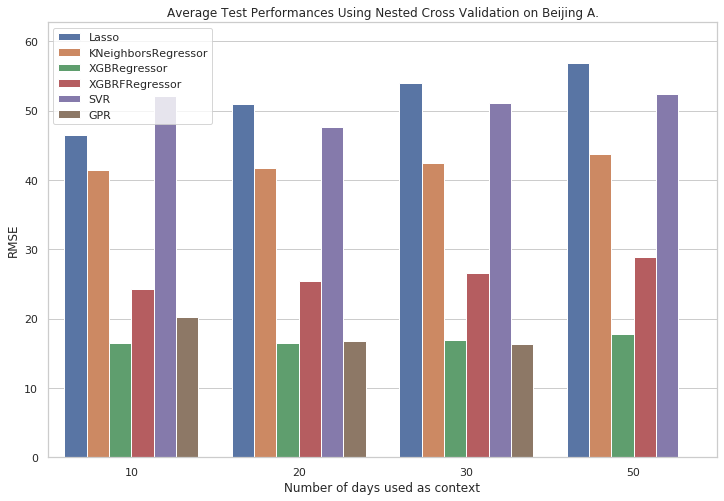

In [17]:
plt.figure(figsize=(12, 8))
df = df[~(df['lastKDays'] == 1)]
sns.barplot(data=df, x="lastKDays", y="rmse", hue="Method", errwidth=0)
plt.ylabel("RMSE")
plt.xlabel("Number of days used as context")
plt.legend(loc="upper left")
plt.title(f"Average Test Performances Using Nested Cross Validation on Beijing A.")

In [22]:
df.groupby(["lastKDays", "Method"]).mean()

is_val_error  stepSize      kout  kin  \
lastKDays Method                                                       
1         IDW                         False       2.0 -1.000000 -1.0   
          KNeighborsRegressor         False       2.0  2.507042 -1.0   
          Kriging                     False       2.0 -1.000000 -1.0   
          Lasso                       False       2.0  2.500000 -1.0   
          SVR                         False       2.0  2.500000 -1.0   
          Spatial GP                  False       2.0 -1.000000 -1.0   
          XGBRegressor                False       2.0  2.500000 -1.0   
10        GPR                         False       2.0  2.522655 -1.0   
          KNeighborsRegressor         False       2.0  2.500000 -1.0   
          Lasso                       False       2.0  2.500000 -1.0   
          SVR                         False       2.0  2.500000 -1.0   
          XGBRFRegressor              False       2.0  2.500000 -1.0   
          XGBRegressor                False       2.0  2.500000 -1.0   
20        GPR                         False       2.0  2.494565 -1.0   
          KNeighborsRegressor         False       2.0  2.500000 -1.0   
          Lasso                       False       2.0  2.500000 -1.0   
          SVR                         False       2.0  2.500000 -1.0   
          XGBRFRegressor              False       2.0  2.500000 -1.0   
          XGBRegressor                False       2.0  2.500000 -1.0   
30        GPR                         False       2.0  2.515385 -1.0   
          KNeighborsRegressor         False       2.0  2.500000 -1.0   
          Lasso                       False       2.0  2.500000 -1.0   
          SVR                         False       2.0  2.500000 -1.0   
          XGBRFRegressor              False       2.0  2.500000 -1.0   
          XGBRegressor                False       2.0  2.500000 -1.0   
50        GPR                         False       2.0  2.549941 -1.0   
          KNeighborsRegressor         False       2.0  2.500000 -1.0   
          Lasso                       False       2.0  2.500000 -1.0   
          SVR                         False       2.0  2.500000 -1.0   
          XGBRFRegressor              False       2.0  2.500000 -1.0   
          XGBRegressor                False       2.0  2.500000 -1.0   

                                  time_ix  hy_ix       rmse        mae  
lastKDays Method                                                        
1         IDW                  179.000000   -1.0  16.348294  12.663302  
          KNeighborsRegressor  178.726761    9.0  15.819625  12.342030  
          Kriging              179.000000   -1.0  14.174288  10.994128  
          Lasso                178.000000    7.0  17.277380  13.753197  
          SVR                  178.000000    5.0  18.016417  14.075834  
          Spatial GP           179.000000   -1.0  14.630799  11.258436  
          XGBRegressor         178.000000   12.0  16.161618  12.495159  
10        GPR                  194.850369   -1.0  20.234332  16.865000  
          KNeighborsRegressor  183.000000    9.0  41.430106  37.572285  
          Lasso                183.000000    7.0  46.514080  43.088327  
          SVR                  183.000000    5.0  52.093573  48.268716  
          XGBRFRegressor       193.000000   12.0  24.308331  20.369007  
          XGBRegressor         183.000000   12.0  16.451227  12.708142  
20        GPR                  193.873913   -1.0  16.796107  13.413240  
          KNeighborsRegressor  188.000000    9.0  41.703029  37.786218  
          Lasso                188.000000    7.0  50.932437  47.415423  
          SVR                  188.000000    5.0  47.626328  43.678932  
          XGBRFRegressor       193.000000   12.0  25.434430  21.488283  
          XGBRegressor         188.000000   12.0  16.510089  12.771814  
30        GPR                  192.419780   -1.0  16.288170  12.894913  
          KNeighborsRegressor  193.000000    9.0

## Beijing B

Text(0.5, 1.0, 'Average Test Performances Using Nested Cross Validation on Beijing B.')

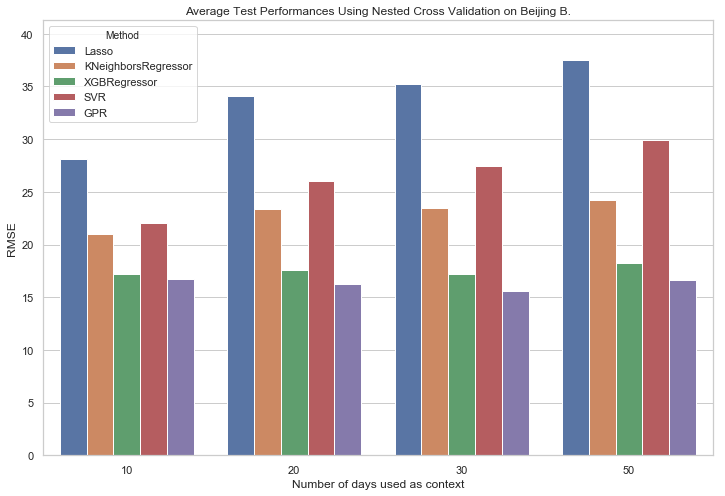

In [10]:
temp = []
for reg in ['las', 'knn', 'xgb', 'xgbRF', 'svr', "gpFULL"]:
    try:
        odf = pd.read_csv(f"./results/beijingb_scaled/{reg}/final.csv")
        new_temp = odf[odf["is_val_error"] == False]
        lastKDayss = new_temp['lastKDays'].unique()
        for lastKDays in lastKDayss:
            temp.append(new_temp[(new_temp['lastKDays'] == lastKDays) & (new_temp['time_ix'] >= lastKDays - 1)])
    except FileNotFoundError:
        pass
df = pd.concat(temp)
# df = df.append(interpols)
df = df[~(df['reg'] == "SVGP") & ~(df['lastKDays'].isin([100, 200]))]
plt.figure(figsize=(12, 8))
df = df.rename(columns={"reg": "Method"})
sns.barplot(data=df, x = "lastKDays", y="rmse", hue="Method", errwidth=0)
plt.ylabel("RMSE")
plt.xlabel("Number of days used as context")
plt.title(f"Average Test Performances Using Nested Cross Validation on Beijing B.")

In [11]:
df.groupby(["lastKDays", "reg"]).mean()

KeyError: 'reg'